In [1]:
import pandas as pd
import numpy as np

🔹 Dataset Context

This dataset contains customer information from a bank marketing campaign. The goal is to predict whether a customer will subscribe to a term deposit.

🔹Problem Statement

Predict whether a customer will subscribe to a term deposit.

**🔹Business** Relevance

Helps bank target only likely customers

Reduces marketing cost

Improves conversion rate

# Load Dataset

In [2]:
df=pd.read_csv("/content/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1130,61,management,married,tertiary,no,6016,no,no,cellular,2,feb,670,3,-1,0,unknown,yes
8962,28,blue-collar,single,primary,no,0,yes,yes,unknown,3,jun,380,4,-1,0,unknown,no
9570,29,blue-collar,single,secondary,no,2806,no,no,cellular,15,oct,294,1,93,5,other,no


In [6]:
df.shape

(11162, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Data Preprocessing

In [10]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [11]:
df.duplicated().sum()

np.int64(0)

### Target variable and Features

In [12]:
X = df.drop('deposit', axis=1)
y = df['deposit']

### Categorical Encoding


Target Encoding

In [13]:
y=y.map({"yes":1,"no":0})

feature encoding

In [14]:
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['education'].unique())
print(df['contact'].unique())
print(df['poutcome'].unique())
print(df['marital'].unique())


['no' 'yes']
['yes' 'no']
['no' 'yes']
['secondary' 'tertiary' 'primary' 'unknown']
['unknown' 'cellular' 'telephone']
['unknown' 'other' 'failure' 'success']
['married' 'single' 'divorced']


In [15]:
binary_cols = ['default','housing','loan']
for col in binary_cols:
    X[col] = X[col].map({'yes':1,'no':0})


In [16]:
education_order = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2,
    'unknown': 3
}

X['education'] = X['education'].map(education_order)


In [17]:
X = pd.get_dummies(X, drop_first=True)

In [18]:
X

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343,1,0,5,1042,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,56,1,0,45,0,0,5,1467,1,-1,...,False,False,False,True,False,False,False,False,False,True
2,41,1,0,1270,1,0,5,1389,1,-1,...,False,False,False,True,False,False,False,False,False,True
3,55,1,0,2476,1,0,5,579,1,-1,...,False,False,False,True,False,False,False,False,False,True
4,54,2,0,184,0,0,5,673,2,-1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,0,1,1,0,20,257,1,-1,...,False,False,False,False,False,False,False,False,False,True
11158,39,1,0,733,0,0,16,83,4,-1,...,False,True,False,False,False,False,False,False,False,True
11159,32,1,0,29,0,0,19,156,2,-1,...,False,False,False,False,False,False,False,False,False,True
11160,43,1,0,0,0,1,8,9,2,172,...,False,False,False,True,False,False,False,False,False,False


In [19]:
X.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

🔹 Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols = ['age','balance','duration','pdays','previous']
X[num_cols]=scaler.fit_transform(X[num_cols])

In [21]:
X

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,1,0,0.252525,1,0,5,1.930226,1,-0.481184,...,False,False,False,True,False,False,False,False,False,True
1,1.239676,1,0,-0.459974,0,0,5,3.154612,1,-0.481184,...,False,False,False,True,False,False,False,False,False,True
2,-0.019470,1,0,-0.080160,1,0,5,2.929901,1,-0.481184,...,False,False,False,True,False,False,False,False,False,True
3,1.155733,1,0,0.293762,1,0,5,0.596366,1,-0.481184,...,False,False,False,True,False,False,False,False,False,True
4,1.071790,2,0,-0.416876,0,0,5,0.867171,2,-0.481184,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,0,0,-0.473616,1,0,20,-0.331287,1,-0.481184,...,False,False,False,False,False,False,False,False,False,True
11158,-0.187357,1,0,-0.246658,0,0,16,-0.832564,4,-0.481184,...,False,True,False,False,False,False,False,False,False,True
11159,-0.774958,1,0,-0.464934,0,0,19,-0.622258,2,-0.481184,...,False,False,False,False,False,False,False,False,False,True
11160,0.148416,1,0,-0.473926,0,1,8,-1.045752,2,1.109571,...,False,False,False,True,False,False,False,False,False,False


# **Exploratory Data Analysis (EDA)**

🔹 Target Distribution

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='deposit', ylabel='count'>

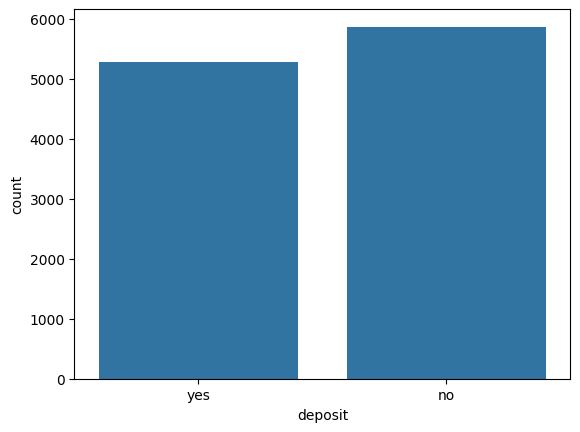

In [23]:

sns.countplot(x="deposit",data=df)



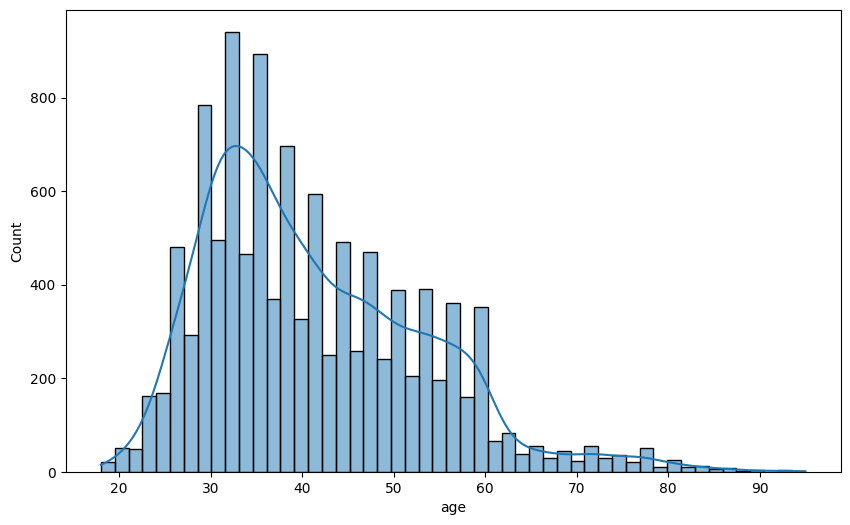

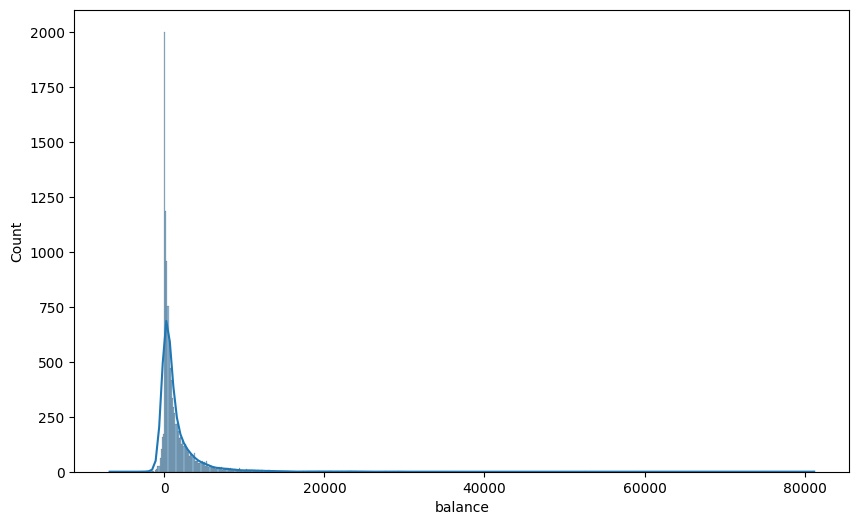

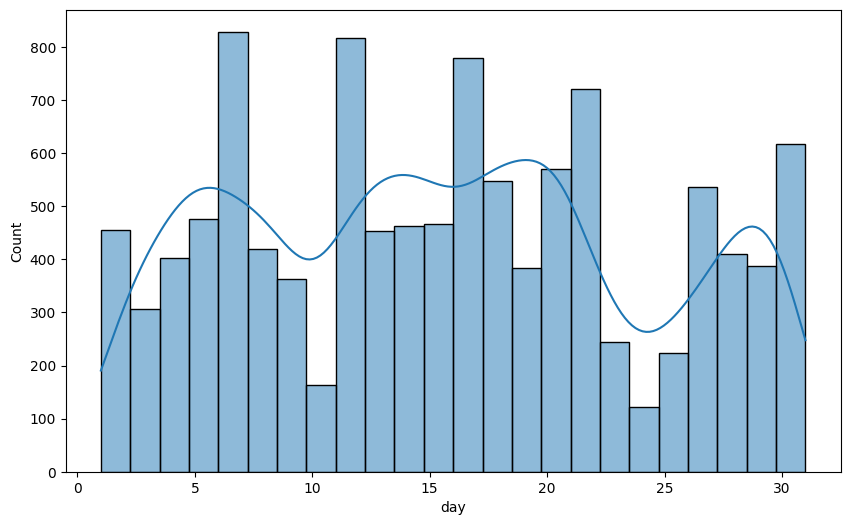

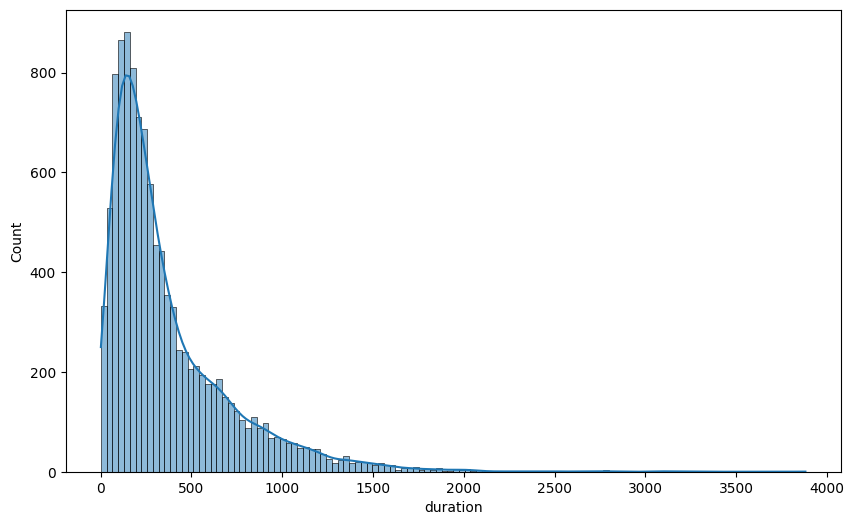

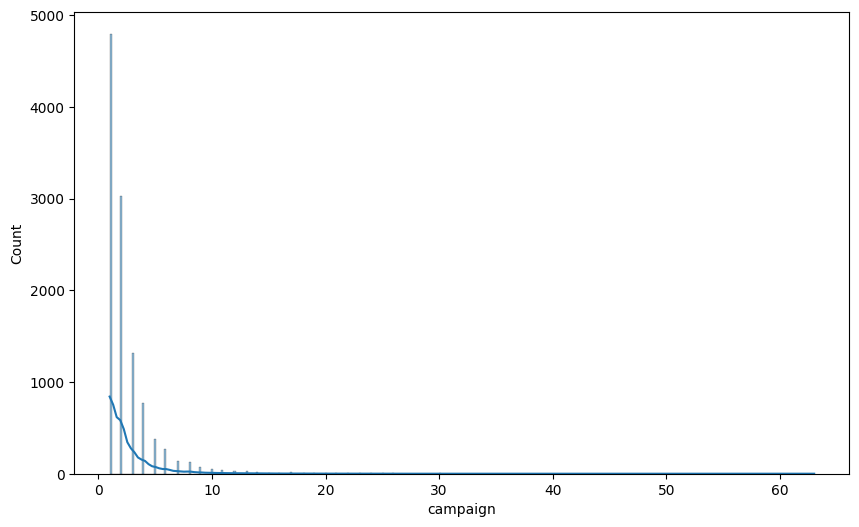

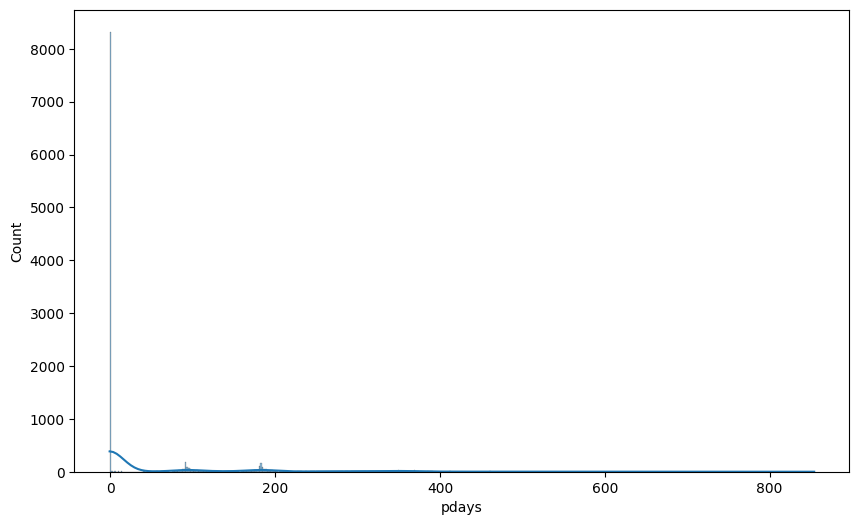

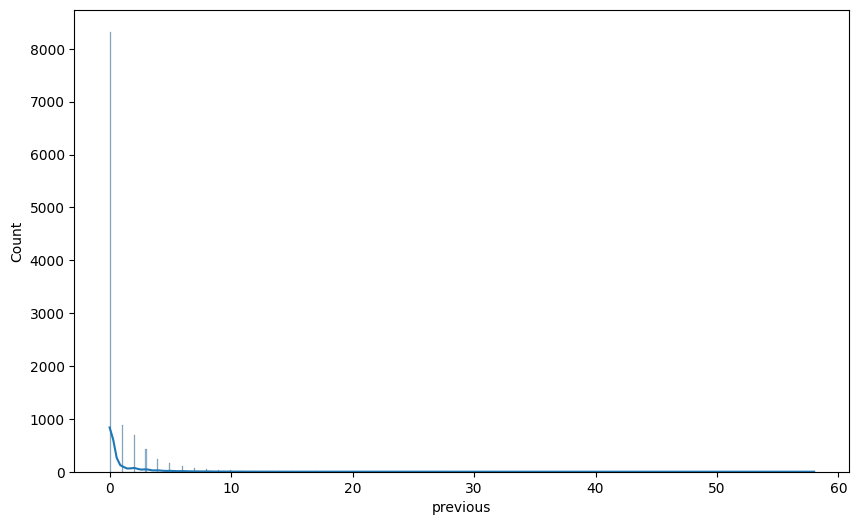

In [24]:
numerical_col=df.select_dtypes(exclude="object").columns
for col in numerical_col:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col],kde=True)
  plt.show()

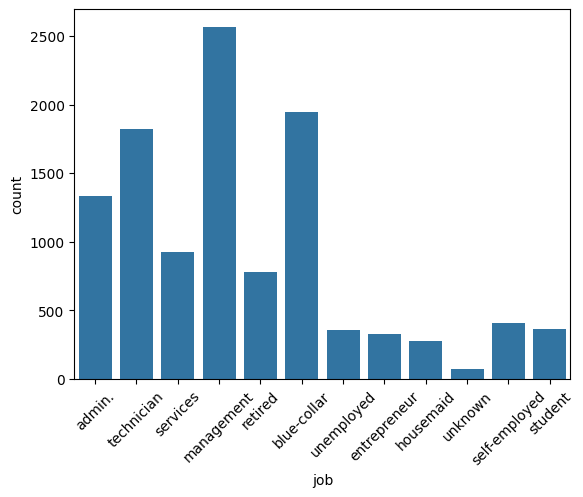

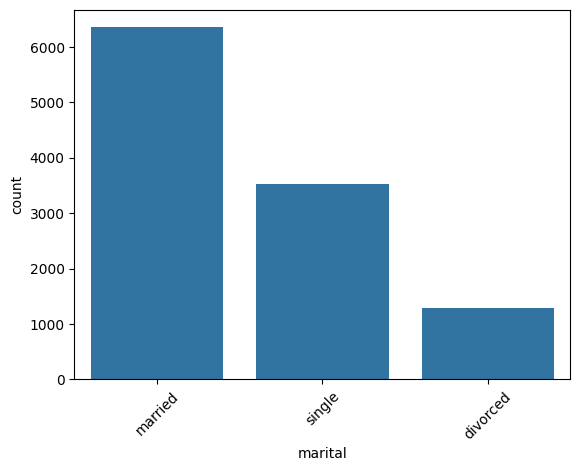

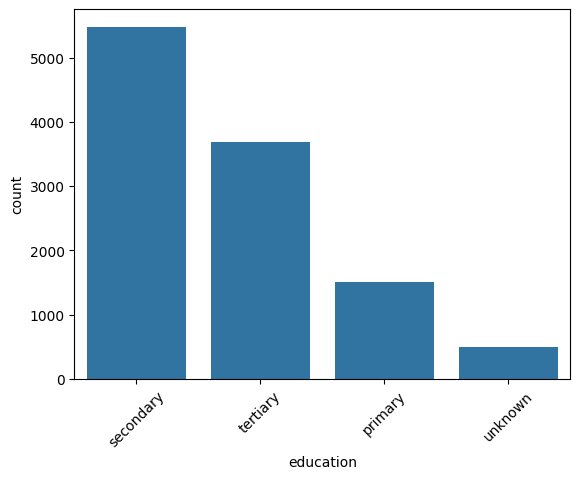

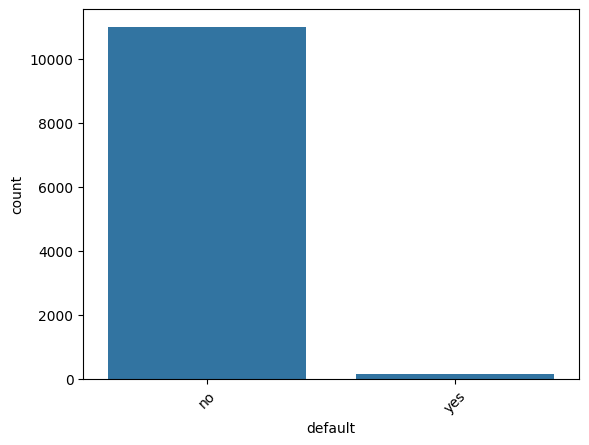

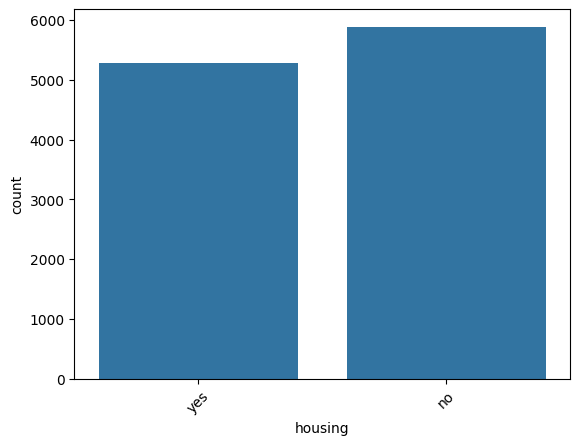

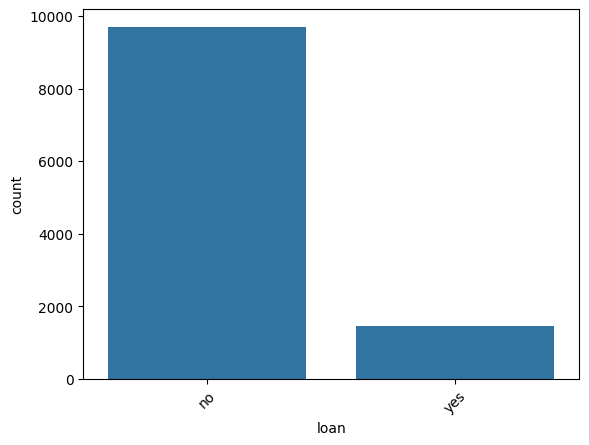

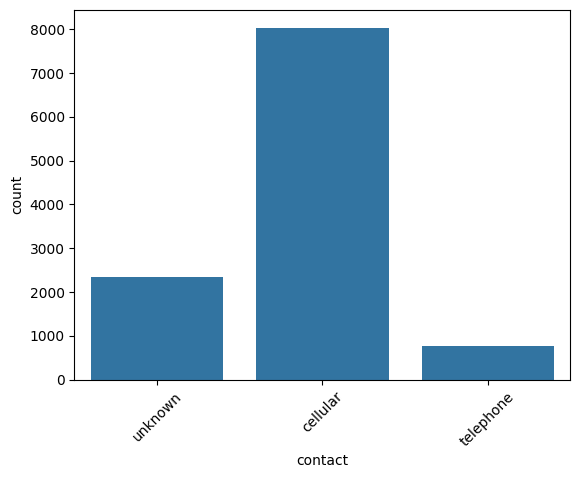

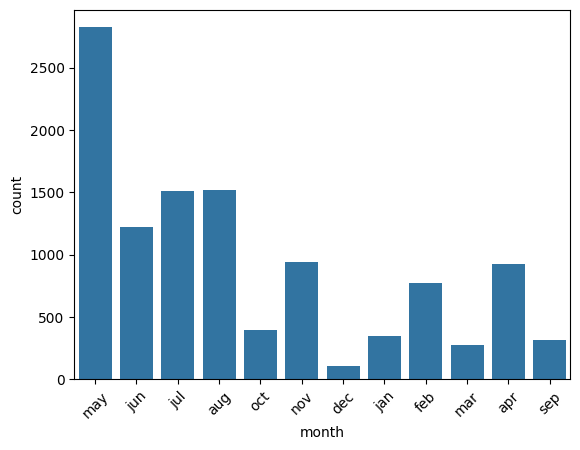

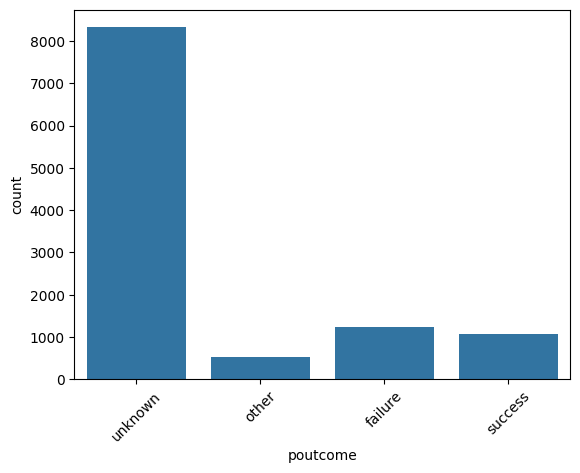

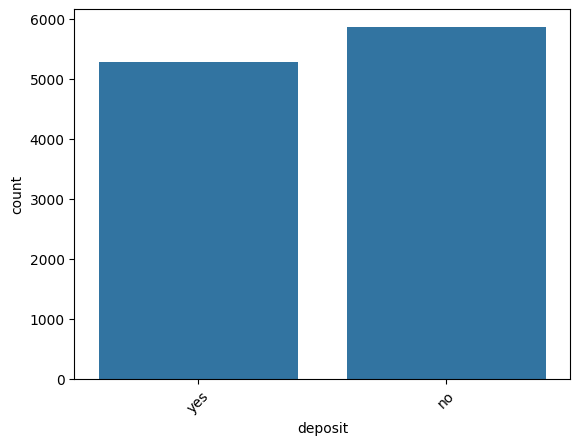

In [25]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()


Heatmap

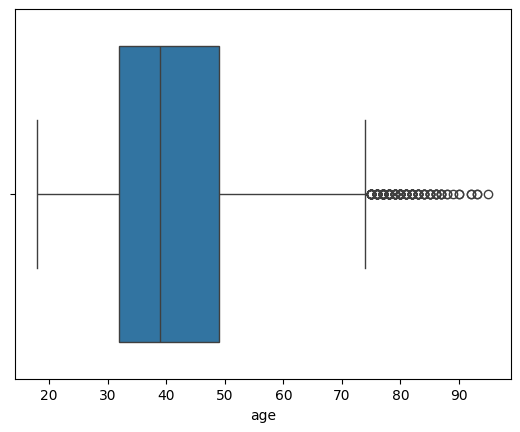

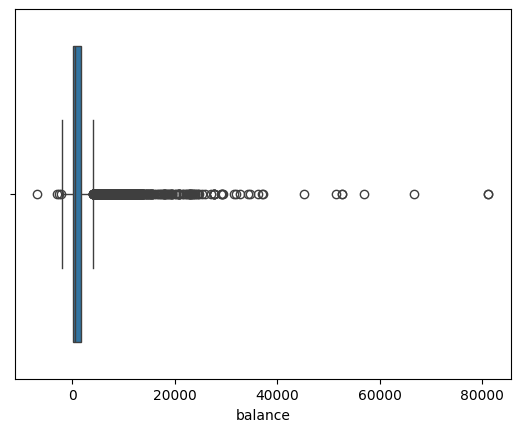

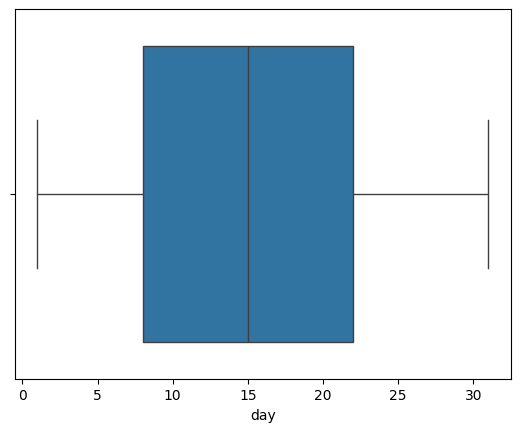

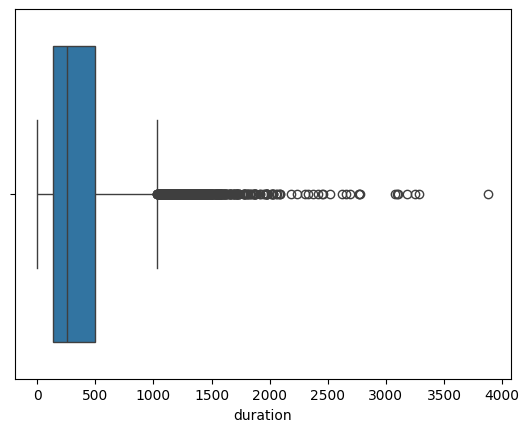

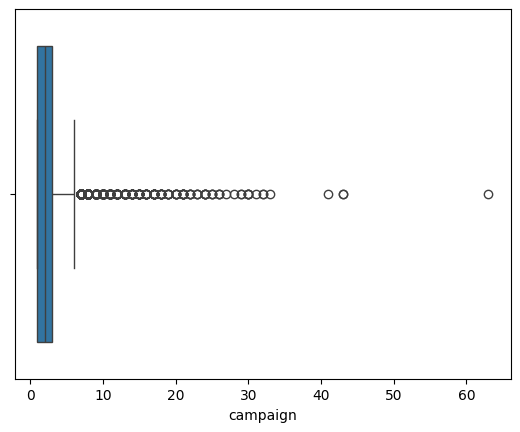

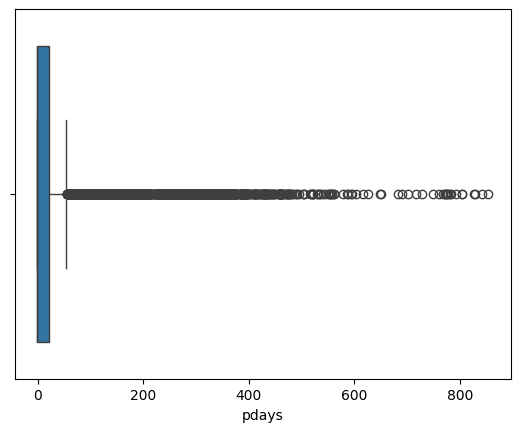

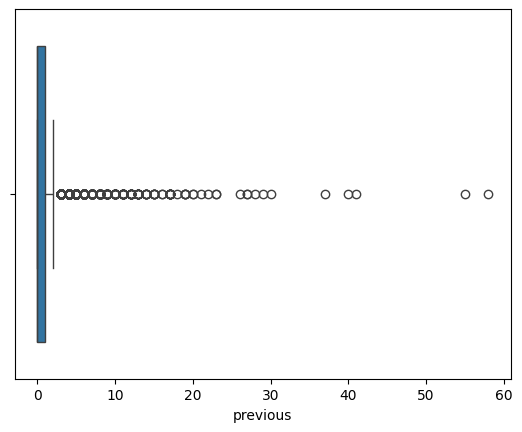

In [26]:
for col in numerical_col:
    sns.boxplot(x=df[col])
    plt.show()


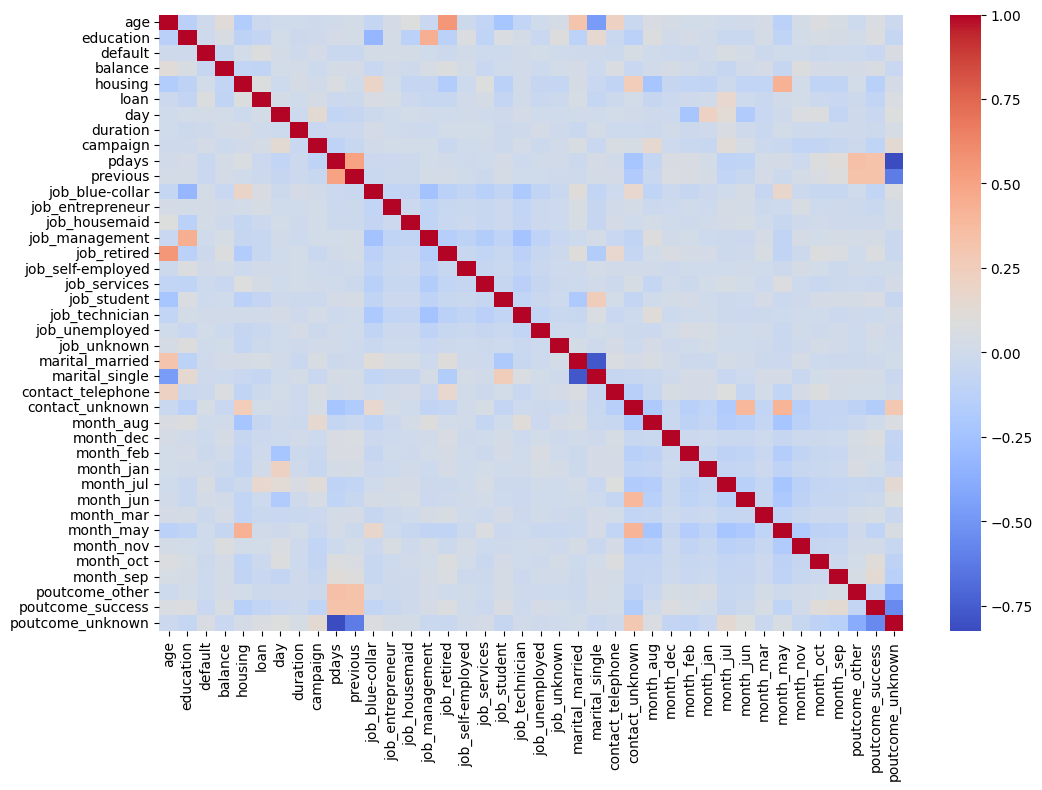

In [27]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.show()


In [29]:
df['job'].value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [30]:
pd.crosstab(df['job'], df['deposit'], normalize='index') * 100


deposit,no,yes
job,,
admin.,52.698651,47.301349
blue-collar,63.580247,36.419753
entrepreneur,62.500000,37.500000
housemaid,60.218978,39.781022
management,49.298519,50.701481
retired,33.676093,66.323907
self-employed,53.827160,46.172840
services,60.021668,39.978332
student,25.277778,74.722222


Counts can mislead if category sizes differ
This shows:

 % of people in each job who subscribed.

This is more powerful than raw barplot.

balance vs deposit

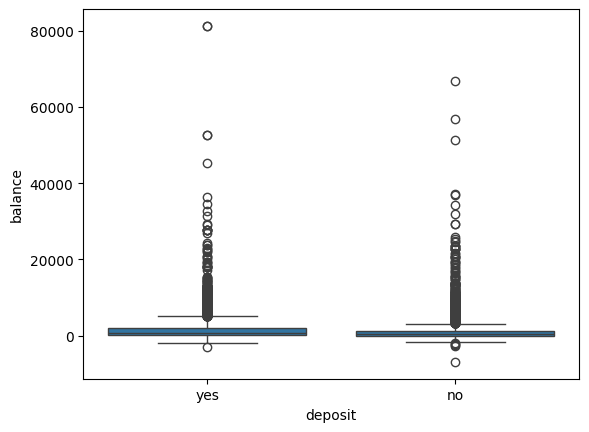

In [28]:
sns.boxplot(x='deposit', y='balance', data=df)
plt.show()


age vs deposit

<Axes: xlabel='age', ylabel='Count'>

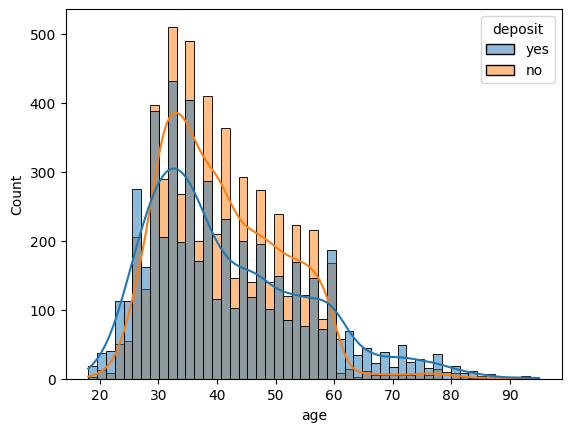

In [40]:
sns.histplot(data=df, x='age', hue='deposit', kde=True)


duration vs deposit

<Axes: xlabel='deposit', ylabel='duration'>

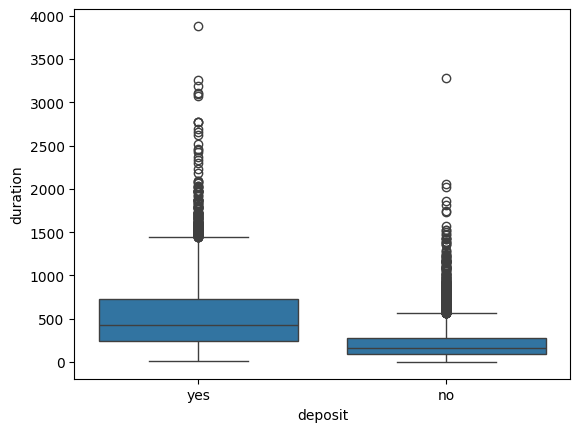

In [34]:
sns.boxplot(x='deposit', y='duration', data=df)


campaign vs deposit

<Axes: xlabel='deposit', ylabel='campaign'>

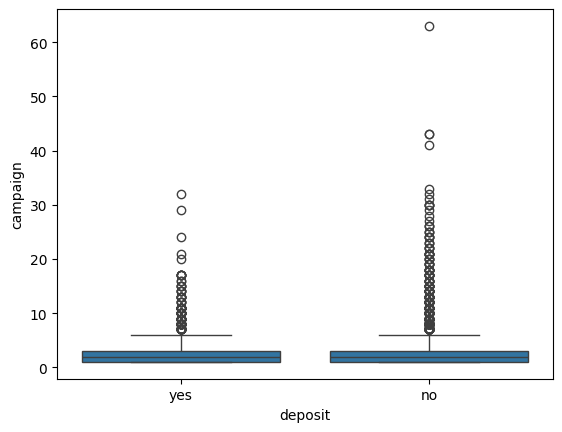

In [35]:
sns.boxplot(x='deposit', y='campaign', data=df)

pdays vs deposit

<Axes: xlabel='deposit', ylabel='pdays'>

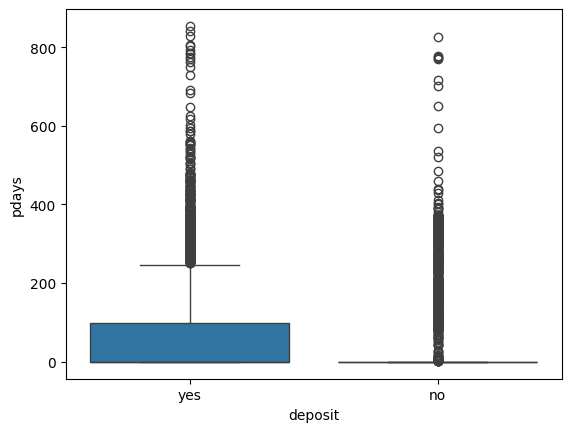

In [36]:

sns.boxplot(x='deposit', y='pdays', data=df)

previous vs deposit

<Axes: xlabel='deposit', ylabel='previous'>

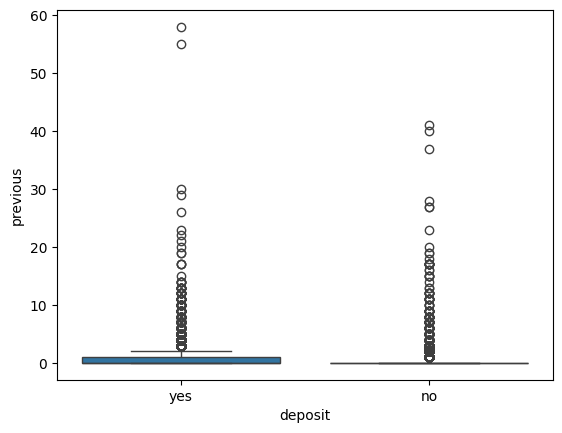

In [37]:
sns.boxplot(x='deposit', y='previous', data=df)

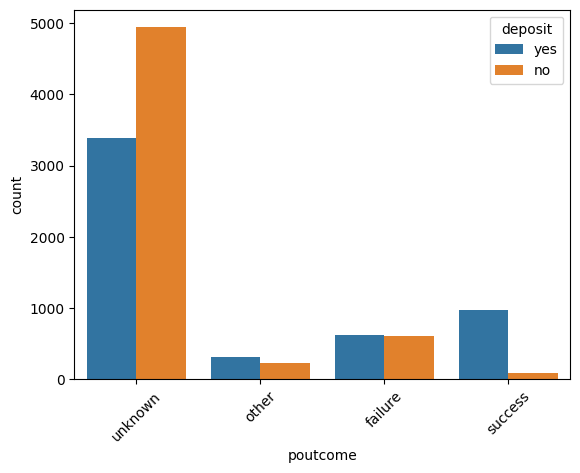

In [45]:

sns.countplot(x='poutcome', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.show()

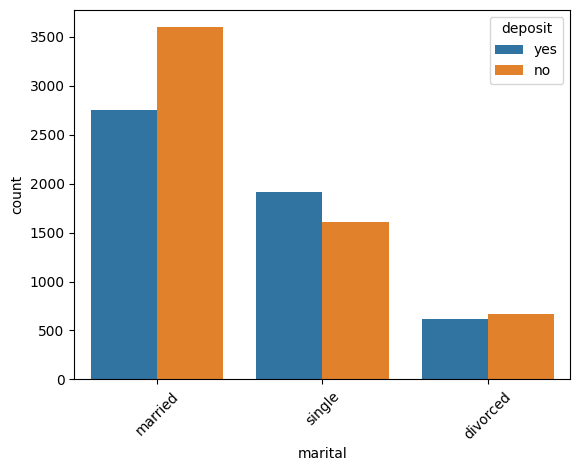

In [47]:
sns.countplot(x='marital', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.show()

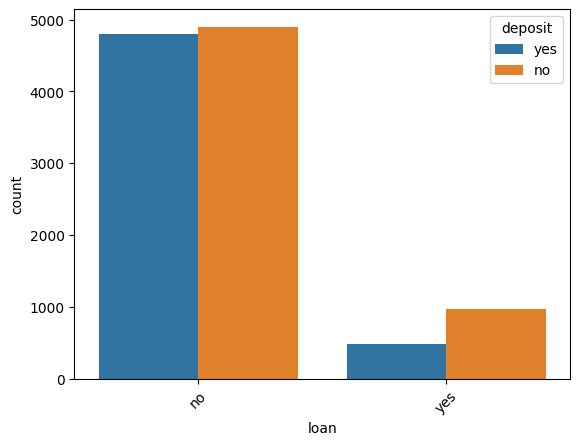

In [48]:
sns.countplot(x='loan', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.show()

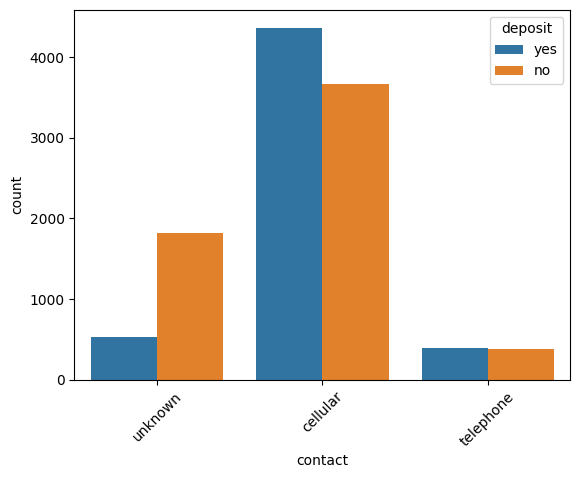

In [49]:
sns.countplot(x='contact', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.show()

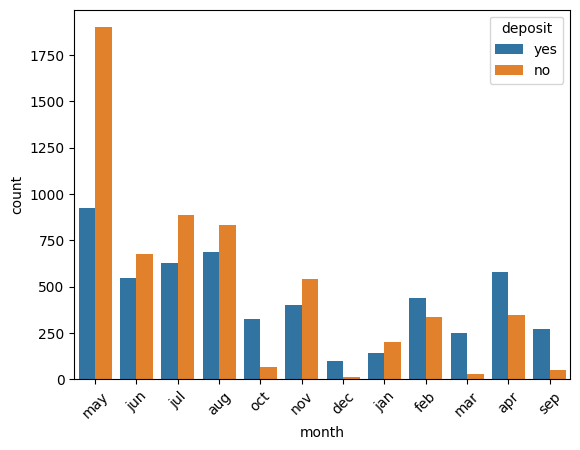

In [53]:
sns.countplot(x='month', hue='deposit', data=df)
plt.xticks(rotation=45)
plt.show()